In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [39]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 14})
plt.rcParams['axes.linewidth'] = 2

In [40]:
def imf(mass, alpha1, alpha2, break_mass, max_mass):
    mask_break = mass <= break_mass
    mask_max = mass <= max_mass
    imf_values = np.zeros_like(mass)
    imf_values[mask_break & mask_max] = mass[mask_break & mask_max]**(-alpha1)
    imf_values[~mask_break & mask_max] = break_mass**(alpha2 - alpha1) * mass[~mask_break & mask_max]**(-alpha2)
    return imf_values

mass_range = np.logspace(np.log10(0.1), np.log10(300), 1000)


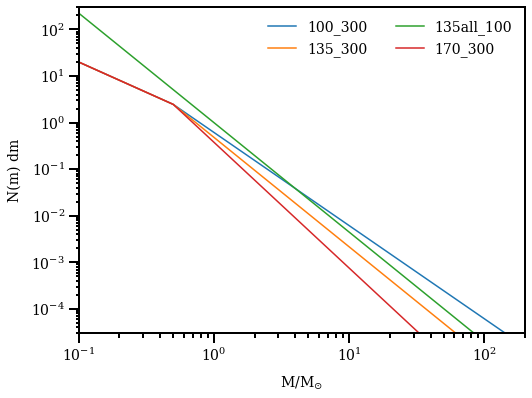

In [48]:
plt.figure(figsize=(8, 6))


plt.gca().xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
plt.gca().xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
plt.gca().xaxis.set_tick_params(which='both')
major_locator_x = ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(major_locator_x)
minor_locator_x = ticker.MultipleLocator(1)
plt.gca().xaxis.set_minor_locator(minor_locator_x)


plt.gca().yaxis.set_tick_params(which='major', size=10, width=2, direction='out', right=True)
plt.gca().yaxis.set_tick_params(which='minor', size=3, width=2, direction='out', right=True)
plt.gca().yaxis.set_tick_params(which='both', right=False)
minor_locator = ticker.MultipleLocator(0.5)
plt.gca().yaxis.set_minor_locator(minor_locator)



plt.loglog(mass_range, imf(mass_range, 1.3, 2, 0.5, 300), label = '100_300')
plt.loglog(mass_range, imf(mass_range, 1.3, 2.35, 0.5, 300), label = '135_300')
plt.loglog(mass_range, imf(mass_range, 2.35, 2.35, 0.5, 100), label = '135all_100')
plt.loglog(mass_range, imf(mass_range, 1.3, 2.7, 0.5, 300), label = '170_300')


#plt.loglog(mass_range, imf(mass_range, 1.3, 2, 0.5, 300), label = '100_300')
#plt.loglog(mass_range, imf(mass_range, 1.3, 2, 0.5, 100), label = '100_100')
#plt.loglog(mass_range, imf(mass_range, 1.3, 2.35, 0.5, 100), label = '135_100')
#plt.loglog(mass_range, imf(mass_range, 1.3, 2.35, 0.5, 300), label = '135_300')
#plt.loglog(mass_range, imf(mass_range, 2.35, 2.35, 0.5, 100), label = '135all_100')
#plt.loglog(mass_range, imf(mass_range, 1.3, 2.7, 0.5, 100), label = '170_100')
#plt.loglog(mass_range, imf(mass_range, 1.3, 2.7, 0.5, 300), label = '170_300')


plt.xlim(1e-1, 2e2)
plt.ylim(3e-5, 3e2)

plt.xlabel(r"M/M$_{\odot}$", labelpad = 10)
plt.ylabel(r"N(m) dm", labelpad = 10)
plt.legend(frameon = False, ncol = 2)
#plt.grid(True)
plt.show()
